#1 HYPERPARAMETER OPTIMALIZATION FOR THE UNCLEANED DATA 
* Which is the best model?
* Show the confusion matrix.
* Show examples of some erroneous predictions. 
* Can you understand where the error is coming from?
* Do some more analysis to better understand how your model behaves.

#<table>
  <tr>
    <th>  </th>
    <th> Logistic regression </th>
    <th> kNN </th>
    <th> Decision Tree </th>
    <th> Random Forests </th>
    <th> Any other technique </th>
  </tr>
  <tr>
    <td> Baseline </td>
    <td> 0.1694 </td>
    <td> 0.1694 </td>
    <td> 0.1694 </td>
    <td> 0.1694 </td>
    <td> 0 </td>
  </tr>
  <tr>
    <td> Precision </td>
    <td> 0.4664 </td>
    <td> 0.2972 </td>
    <td> 0.3226 </td>
    <td> 0.4149 </td>
    <td> 0 </td>
  </tr>
  <tr>
    <td> Recall </td>
    <td> 0.4594 </td>
    <td> 0.2031 </td>
    <td> 0.3240 </td>
    <td> 0.3906 </td>
    <td> 0 </td>
  </tr>
  <tr>
    <td> F1-score </td>
    <td> 0.4557 </td>
    <td> 0.1183 </td>
    <td> 0.3135 </td>
    <td> 0.3735 </td>
    <td> 0 </td>
  </tr>
  <tr>
    <td> Accuracy </td>
    <td> 0.4594 </td>
    <td> 0.2031 </td>
    <td> 0.3240 </td>
    <td> 0.3906 </td>
    <td> 0 </td>
  </tr>
</table>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
#import nltk
#nltk.download('all')

In [2]:
df =pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/training_data.csv",) 
df.head()

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1
2,2,Le test de niveau en français est sur le site ...,A1
3,3,Est-ce que ton mari est aussi de Boston?,A1
4,4,"Dans les écoles de commerce, dans les couloirs...",B1


In [3]:
df_test = pd.read_csv("https://raw.githubusercontent.com/KrzysztofSzerenos/DMML2022_-Hublot/main/data/unlabelled_test_data.csv",)
df_test = df_test['sentence']
X_test_set = df_test

#GENERAL DATAFRAME INFORMATION:


##Checking data shapes: 
###- 3 columns 
###- 4800 rows

In [4]:
df.shape

(4800, 3)

##Checking if data has any NaN values
###- as we can see there is no NaN values

In [5]:
 df.isnull().any()

id            False
sentence      False
difficulty    False
dtype: bool

##Count of number of occurencies for each value presented in dataframe's "difficulty" column

In [6]:
df['difficulty'].value_counts()

A1    813
C2    807
C1    798
B1    795
A2    795
B2    792
Name: difficulty, dtype: int64

## BASE RATE =  (most frequent class) / (total observations) --> IS THE BASELINE THE SAME?

In [7]:
base_rate = np.max(df.difficulty.value_counts()/df.sentence.shape[0]) 
print(f"Base rate:\n{base_rate:.4f}")

Base rate:
0.1694


# LOGISTIC REGRESSION 
###(Only vectorization, without any datacleaning as asked in the Kaggle competition.)

In [8]:
df.columns

Index(['id', 'sentence', 'difficulty'], dtype='object')

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

## Split in Train (80%) Test (20%) 

In [10]:
X = df['sentence']
y = df['difficulty']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
np.unique(y, return_counts=True)

(array(['A1', 'A2', 'B1', 'B2', 'C1', 'C2'], dtype=object),
 array([813, 795, 795, 792, 798, 807]))

## Vectorization (CountVectorizer)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()  # vectorization
vectorizer.fit(X,y)
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_df_test = vectorizer.transform(df_test)

##Setting up the model and its parameters

In [12]:
classifier = LogisticRegression(max_iter=1000, solver='lbfgs')
classifier.fit(X_train_vec, y_train)
log_reg_pred = classifier.predict(X_test_vec)
# QUESTIONS: can I do more than just vectorization? Can we use LogisticRegrssionCV instead of LogisticRegression????????? Why we get the lower accuracy while using CV?

##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score


ACCURACY SCORE:
0.4594
CLASSIFICATION REPORT:
	Precision: 0.4664
	Recall: 0.4594
	F1_Score: 0.4557
0.4594


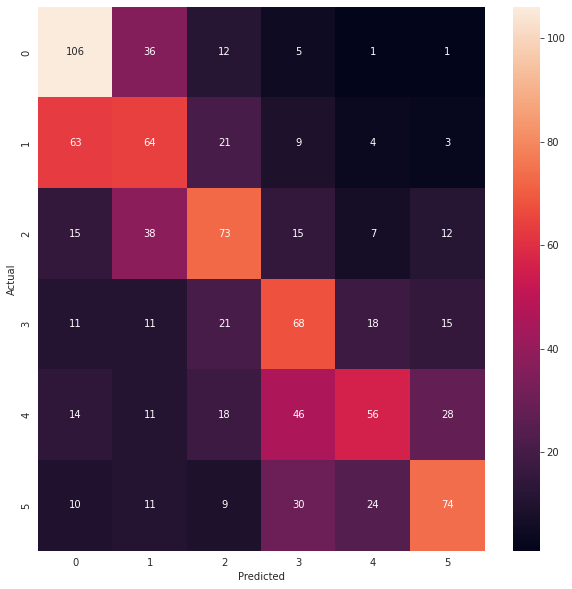

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, log_reg_pred)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, log_reg_pred)

# K-Nearest Neighbors


In [14]:
from pandas.core.common import random_state
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()

k_range = list(range(1, 6))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn,  param_grid, cv=5, scoring='accuracy',return_train_score=False,verbose=False)

grid_search=grid.fit(X_train_vec, y_train)


In [15]:
grid_search.best_params_

{'n_neighbors': 1}

In [16]:
grid_search.best_score_ 

0.23020833333333335

##Setting up the model and its parameters

In [17]:
# YOUR CODE HERE

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
y_pred_knn = knn.predict(X_test_vec)

##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

ACCURACY SCORE:
0.2031
CLASSIFICATION REPORT:
	Precision: 0.2972
	Recall: 0.2031
	F1_Score: 0.1183
0.2031


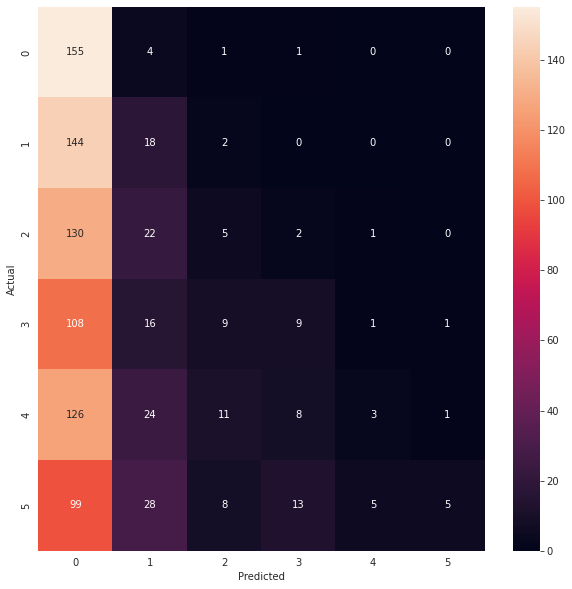

In [18]:
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, y_pred_knn)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred_knn)
# Accuracy, Precision, Recall, F1_score

# Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score

## Looking for the optimal number of tree depth

In [20]:
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores

def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()

In [21]:
tree_depths = range(1,26)
cv_scores_mean, cv_scores_std, accuracy_scores = run_cross_validation_on_trees(X_train_vec, y_train, tree_depths)

The optimal depth - 12 trees


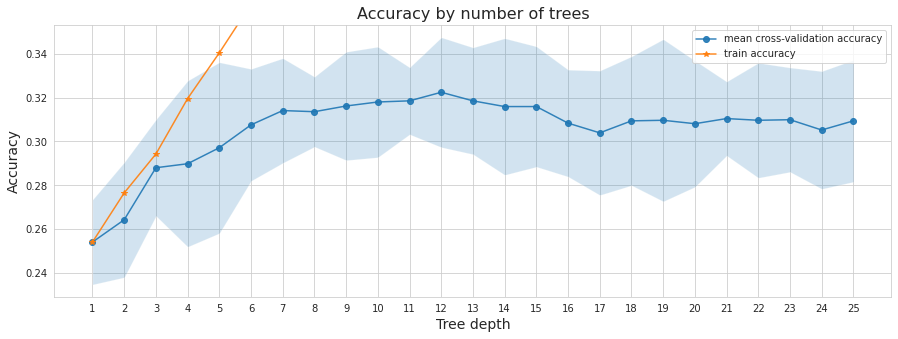

In [22]:
plot_cross_validation_on_trees(tree_depths, cv_scores_mean, cv_scores_std, accuracy_scores, 'Accuracy by number of trees')
max_score = cv_scores_mean.argmax()
best_tree_depth = tree_depths[max_score]
best_tree_cv_score = cv_scores_mean[max_score]
best_tree_cv_score_std = cv_scores_std[max_score]
print('The optimal depth - {} trees'.format(best_tree_depth, round(best_tree_cv_score*100,5), round(best_tree_cv_score_std*100, 5)))

##Setting up the model and its parameters

In [23]:
Tree = DecisionTreeClassifier(max_depth=14, random_state=0)
Tree.fit(X_train_vec, y_train)
tree_pred = Tree.predict(X_test_vec)

##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

ACCURACY SCORE:
0.3260
CLASSIFICATION REPORT:
	Precision: 0.3241
	Recall: 0.3260
	F1_Score: 0.3113
0.326


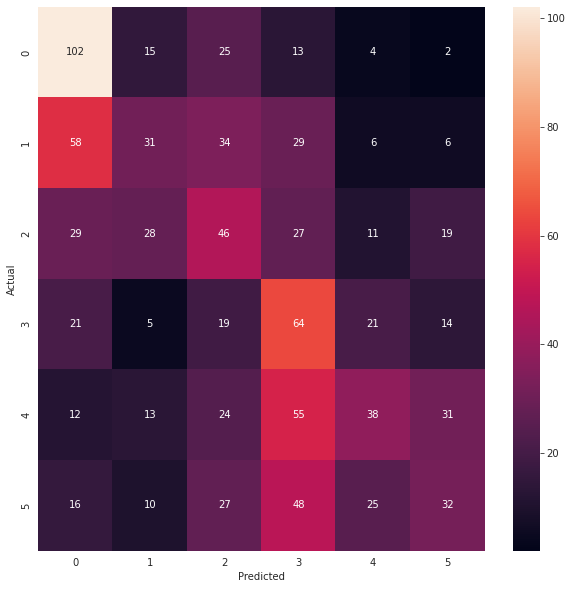

In [24]:
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, tree_pred)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, tree_pred)

# Random Forest

##Setting up the model and its parameters

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf=RandomForestClassifier(n_estimators =400,criterion="entropy",random_state =0)
classifier_rf.fit(X_train_vec,y_train)
y_pred_rf = classifier_rf.predict(X_test_vec)

##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

ACCURACY SCORE:
0.3906
CLASSIFICATION REPORT:
	Precision: 0.4149
	Recall: 0.3906
	F1_Score: 0.3735
0.3906


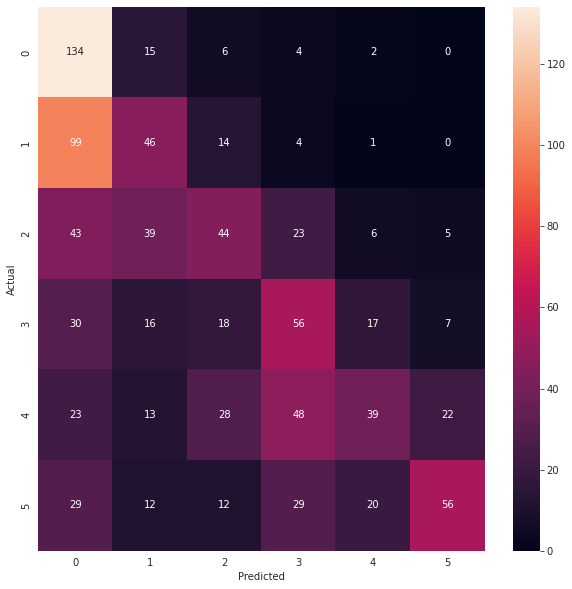

In [26]:
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, y_pred_rf)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred_rf)

# Naive Bayes Model

##Setting up the model and its parameters

In [27]:
from sklearn.naive_bayes import GaussianNB

def set_random_seed(seed=0):
  np.random.seed(seed)
  random.seed(seed)
  set_random_seed(0)
  
classifier_NB = GaussianNB()
X_train_vec_t = X_train_vec.todense()
X_test_vec_t = X_test_vec.todense()
X_df_test_dense = X_df_test.todense() # this line was set up just for Kaggle submision purpose
classifier_NB.fit(X_train_vec_t, y_train)
y_pred_NB = classifier_NB.predict(X_test_vec_t)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


##Model evaluation with Confusion Matrix and all the required in project measures:
- Accuracy
- Precision
- Recall
- F1 score

ACCURACY SCORE:
0.4292
CLASSIFICATION REPORT:
	Precision: 0.4325
	Recall: 0.4292
	F1_Score: 0.4292
0.4292


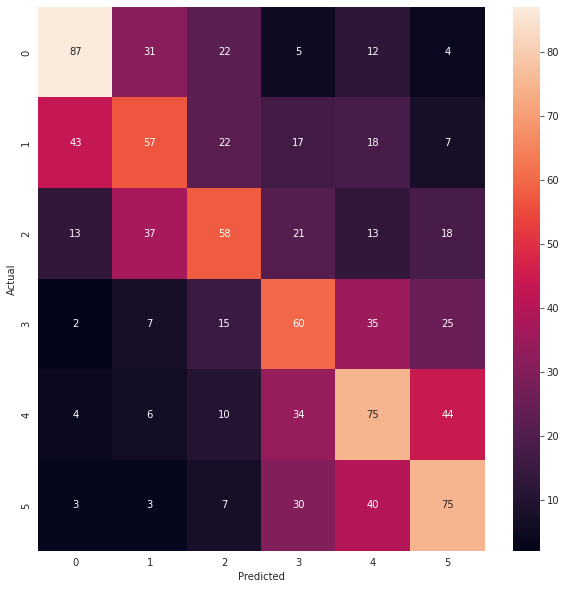

In [28]:
def evaluate(test, pred):
  precision = precision_score(test, pred, average='weighted')
  recall = recall_score(test, pred, average='weighted')
  f1= f1_score(test, pred, average='weighted')
  print(f"ACCURACY SCORE:\n{accuracy_score(test, pred) :.4f}")
  print(f'CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}')
evaluate(y_test, y_pred_NB)
def accuracy_conf_mat(test, pred):
  print(round(accuracy_score(test, pred), 4))
  conf_mat = confusion_matrix(test, pred)
  fig, ax = plt.subplots(figsize=(10,10))
  sns.heatmap(conf_mat, annot=True, fmt='d')
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()

accuracy_conf_mat(y_test, y_pred_NB)